[링크 텍스트](https://)# Feature Detection

국민대학교 차량지능기초 SLAM 파트 과제 1

- 학번 : 20161890
- 이름 : 고의석

---

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/7eb4b2a440824bb0a8c2c7ce3da7a4e2/)

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 2021년 5월 26일까지입니다.
- 과제는 Colab에서 작성한 것을 다운받아 (파일-.ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

In [ ]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy 1.19.5
opencv 4.1.2


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인 
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [ ]:
!ls '/content/drive/My Drive/autonomous/'

 feature  'Feature Detection_20161890_고의석'   ㅇㅇ.gdoc


In [ ]:
ROOT = '/content/drive/My Drive/autonomous/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

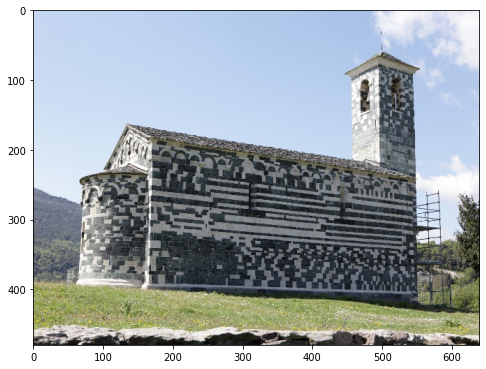

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

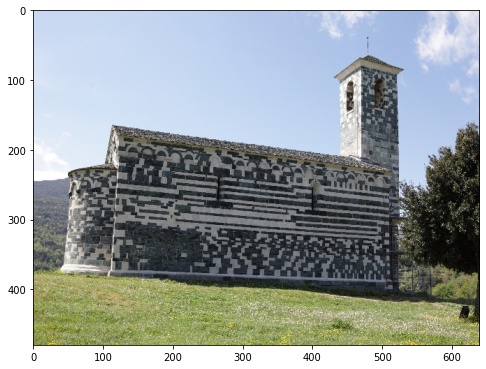

In [ ]:
img2 = cv.imread( ROOT + 'feature/DPP_0011.JPG')
img3 = cv.imread(ROOT + 'feature/DPP_0013.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img2[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

**과제**
- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)` 


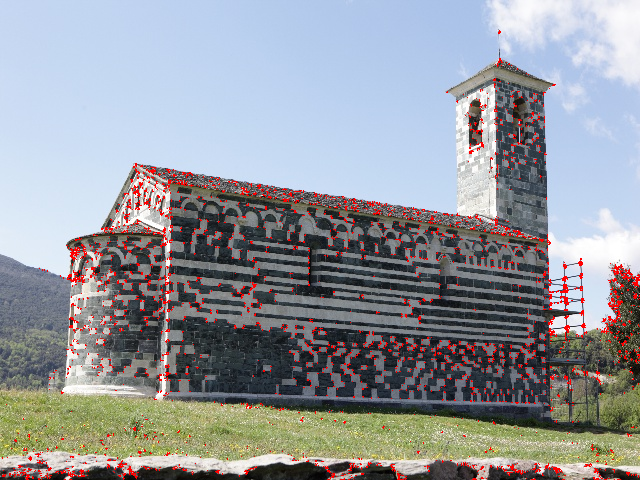

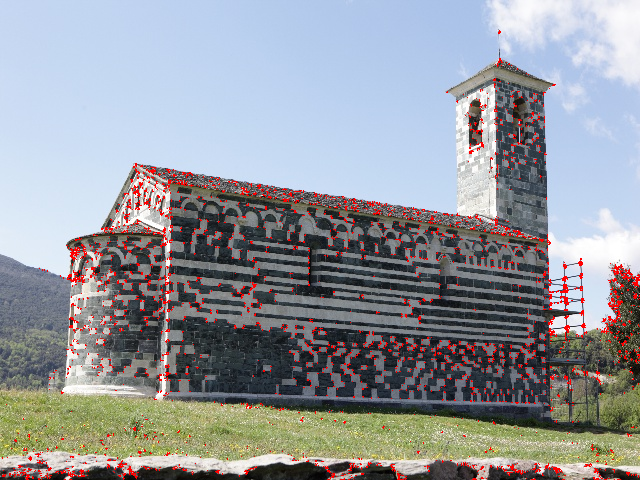

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
from google.colab.patches import cv2_imshow
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

dst = cv.cornerHarris(gray,1,1,0.08)
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()


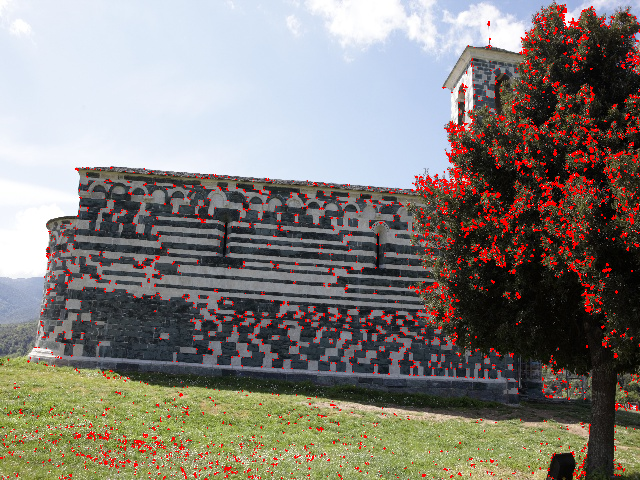

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0013.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

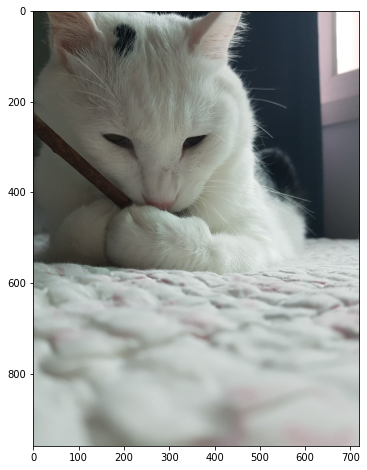

In [ ]:
cat_img = cv.imread(ROOT + 'feature/cat1.jpg')

plt.figure(figsize=(8,8))
plt.imshow(cat_img[:,:,::-1])
plt.show()

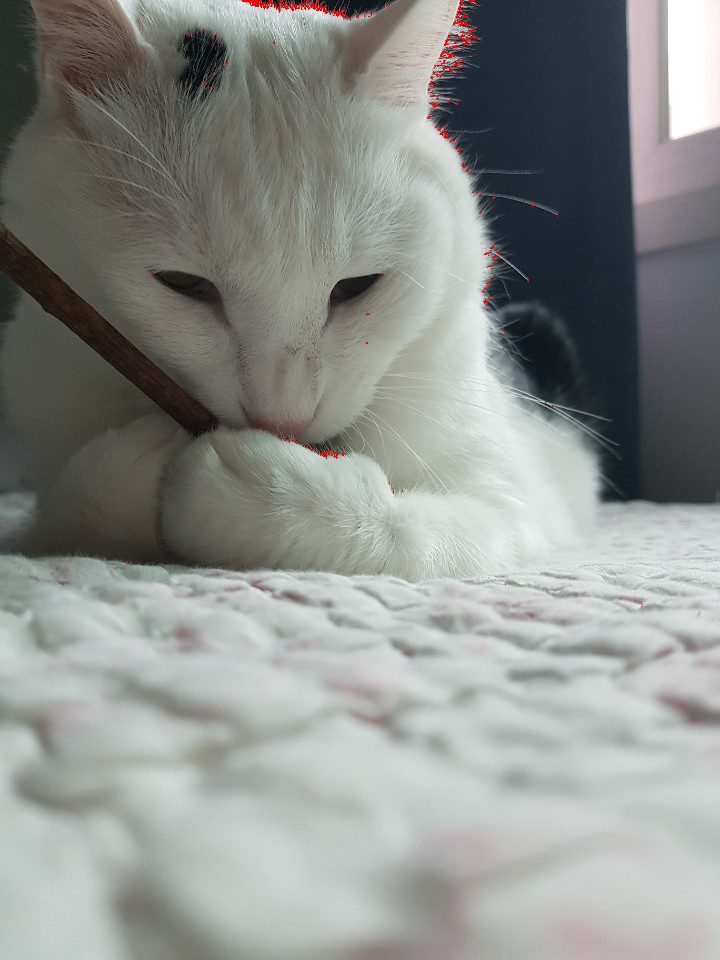

In [ ]:
img = cv.imread( ROOT + 'feature/cat1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

### Fast Corner Detection 

연산이 빠른 corner detection 알고리즘이다 


**과제**
- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

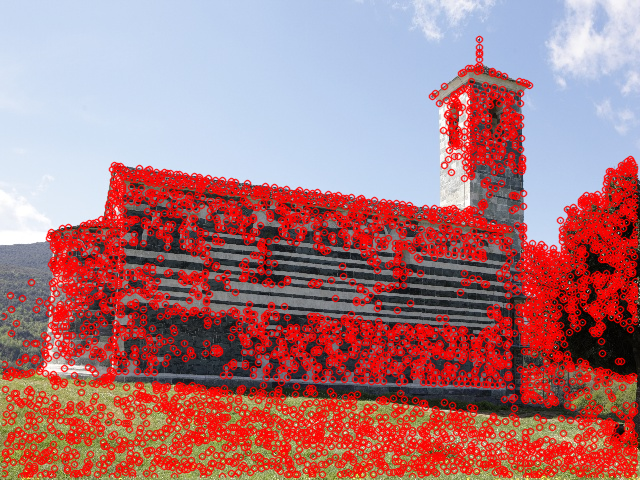

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0011.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
gray = np.float32(gray)
retval  = cv.FastFeatureDetector_create(40)
kp = retval.detect(img, None)
tmp =  None
tmp = cv.drawKeypoints(img, kp, tmp, (0, 0, 255))
cv2_imshow(tmp)

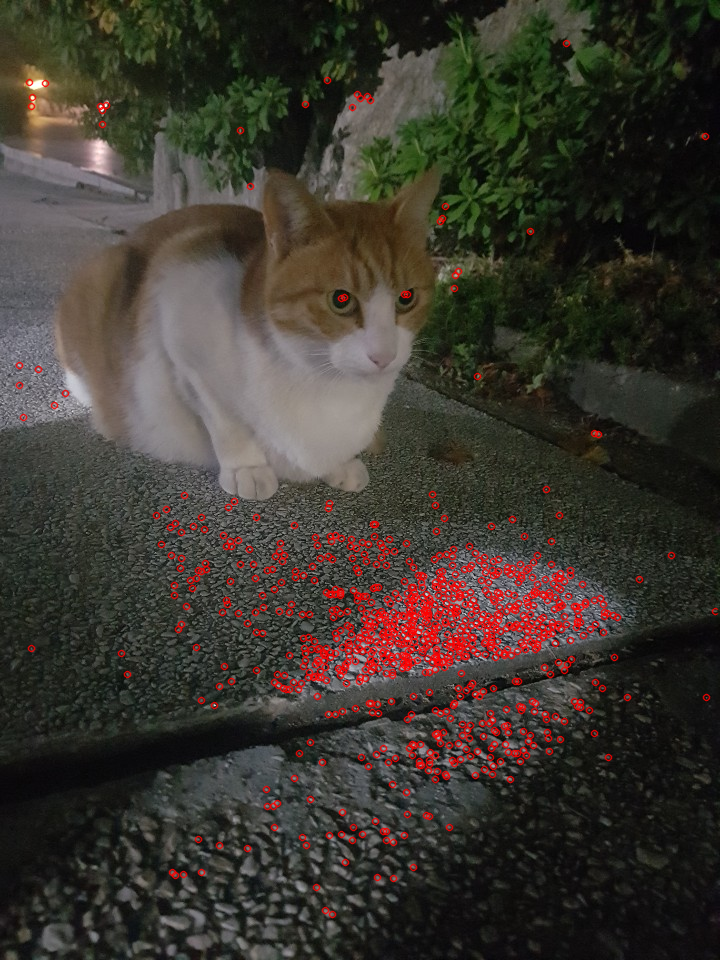

In [ ]:
img = cv.imread( ROOT + 'feature/cat2.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
gray = np.float32(gray)
retval  = cv.FastFeatureDetector_create(60)
kp = retval.detect(img, None)
tmp =  None
tmp = cv.drawKeypoints(img, kp, tmp, (0, 0, 255))
cv2_imshow(tmp)

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

**과제**
-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


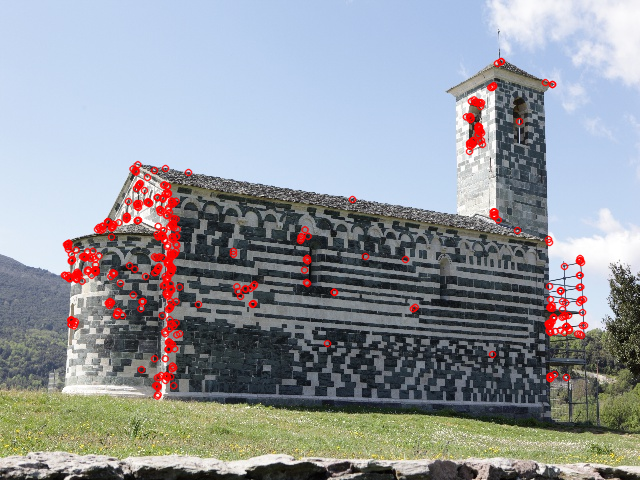

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
out = None
orb =  cv.ORB_create()
kp, des = orb.detectAndCompute(img, None)

out = cv.drawKeypoints(img, kp, out, (0, 0, 255), flags=0)

cv2_imshow(out)
cv.waitKey(0)
cv.destroyAllWindows()

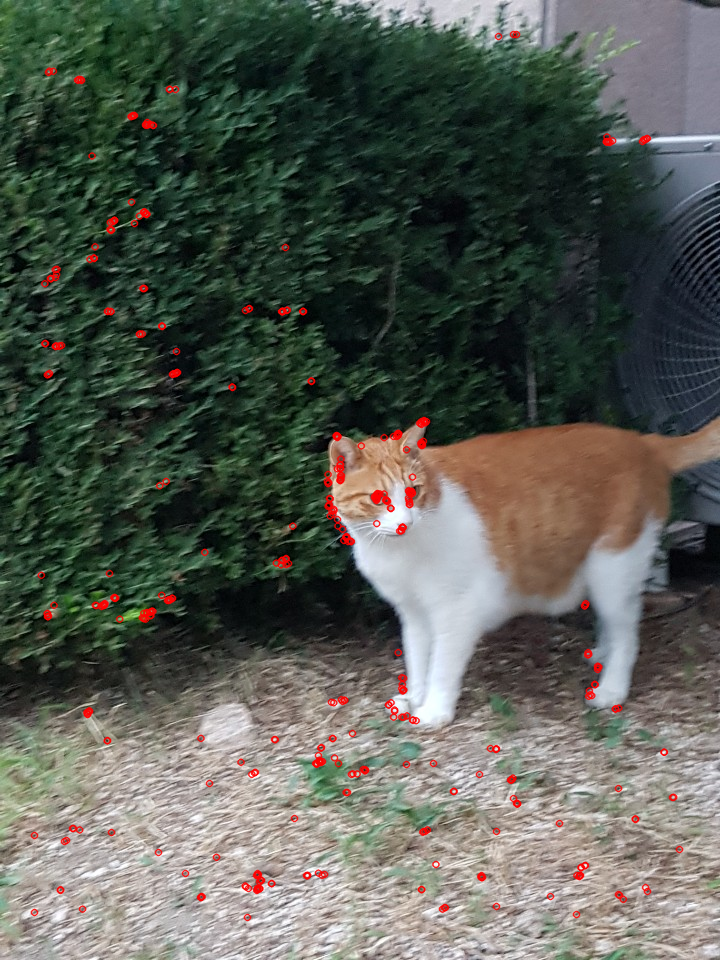

In [ ]:
img = cv.imread( ROOT + 'feature/cat3.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

out = None
orb =  cv.ORB_create()
kp, des = orb.detectAndCompute(img, None)

out = cv.drawKeypoints(img, kp, out, (0, 0, 255), flags=0)

cv2_imshow(out)
cv.waitKey(0)
cv.destroyAllWindows()

### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

**과제**
- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# !pip install opencv-contrib-python==3.4.5.20
# !pip install opencv-contrib-python-nonfree

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)
img = cv.drawKeypoints(gray, kp, img)
cv2_imshow(out)
cv.waitKey(0)
cv.destroyAllWindows()

### SURF feature detection


SURF(Speeded-Up Robust Features)는 인텐서티 계산 방법을 간략화 하는 등의 방법으로 SIFT 방법의 속도와 안정성을 개선한 것이다. 

**과제**
- SURF feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
- `retval	=	cv.xfeatures2d.SURF_create(	[, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]]	)
`


In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
tmp = None
surf = cv.xfeatures2d.SURF_create()
surf.setHessianThreshold(10000)

kp, dst = surf.detectAndCompute(img, None)
tmp = cv.drawKeypoints(gray, kp, tmp, (255, 0, 0), 4)

cv2_imshow(out)
cv.waitKey(0)
cv.destroyAllWindows()

### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.